In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ewenme transfer data/data.csv')
df = df.dropna()
df = df[df.year >= 2014]
df_out = df[df.transfer_movement == 'out']
df = df[df.transfer_movement == 'in']
df

Unnamed: 0       club_name        player_name   age  \
117340           0  Ajax Amsterdam  Richairo Zivkovic  17.0   
117341           1  Ajax Amsterdam     Nick Viergever  24.0   
117342           2  Ajax Amsterdam      Diederik Boer  33.0   
117343           3  Ajax Amsterdam       Niki Zimling  29.0   
117344           4  Ajax Amsterdam    Arkadiusz Milik  20.0   
...            ...             ...                ...   ...   
167276         503        Elche CF         Lucas Boyé  24.0   
167277         504        Elche CF        Jony Ñiguez  35.0   
167278         505        Elche CF         Manu Justo  24.0   
167290         517   Villarreal CF   Santiago Cáseres  23.0   
167291         518       SD Huesca       Damián Musto  33.0   

                  position club_involved_name                      fee  \
117340      Centre-Forward       FC Groningen                   £1.94m   
117341         Centre-Back         AZ Alkmaar                   £1.80m   
117342          Goalkeeper         PEC Zwolle                  £900Th.   
117343  Defensive Midfield     1.FSV Mainz 05         Loan fee:£450Th.   
117344      Centre-Forward    Bay. Leverkusen                     Loan   
...                    ...                ...                      ...   
167276      Centre-Forward             Torino                     Loan   
167277    Central Midfield        CD Alcoyano  End of loanJul 27, 2020   
167278        Right Winger       Celta Vigo B  End of loanJun 30, 2020   
167290  Defensive Midfield            América  End of loanDec 31, 2020   
167291  Defensive Midfield      Internacional  End of loanDec 31, 2020   

       transfer_movement transfer_period  fee_cleaned       league_name  year  \
117340                in          Summer         1.94        Eredivisie  2014   
117341                in          Summer         1.80        Eredivisie  2014   
117342                in          Summer         0.90        Eredivisie  2014   
117343                in          Summer         0.45        Eredivisie  2014   
117344                in          Summer         0.00        Eredivisie  2014   
...                  ...             ...          ...               ...   ...   
167276                in          Summer         0.00  Primera Division  2020   
167277                in          Summer         0.00  Primera Division  2020   
167278                in          Summer         0.00  Primera Division  2020   
167290                in          Winter         0.00  Primera Division  2020   
167291                in          Winter         0.00  Primera Division  2020   

           season  
117340  2014/2015  
117341  2014/2015  
117342  2014/2015  
117343  2014/2015  
117344  2014/2015  
...           ...  
167276  2020/2021  
167277  2020/2021  
167278  2020/2021  
167290  2020/2021  
167291  2020/2021  

[22061 rows x 13 columns]

In [3]:
list(df)

['Unnamed: 0',
 'club_name',
 'player_name',
 'age',
 'position',
 'club_involved_name',
 'fee',
 'transfer_movement',
 'transfer_period',
 'fee_cleaned',
 'league_name',
 'year',
 'season']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


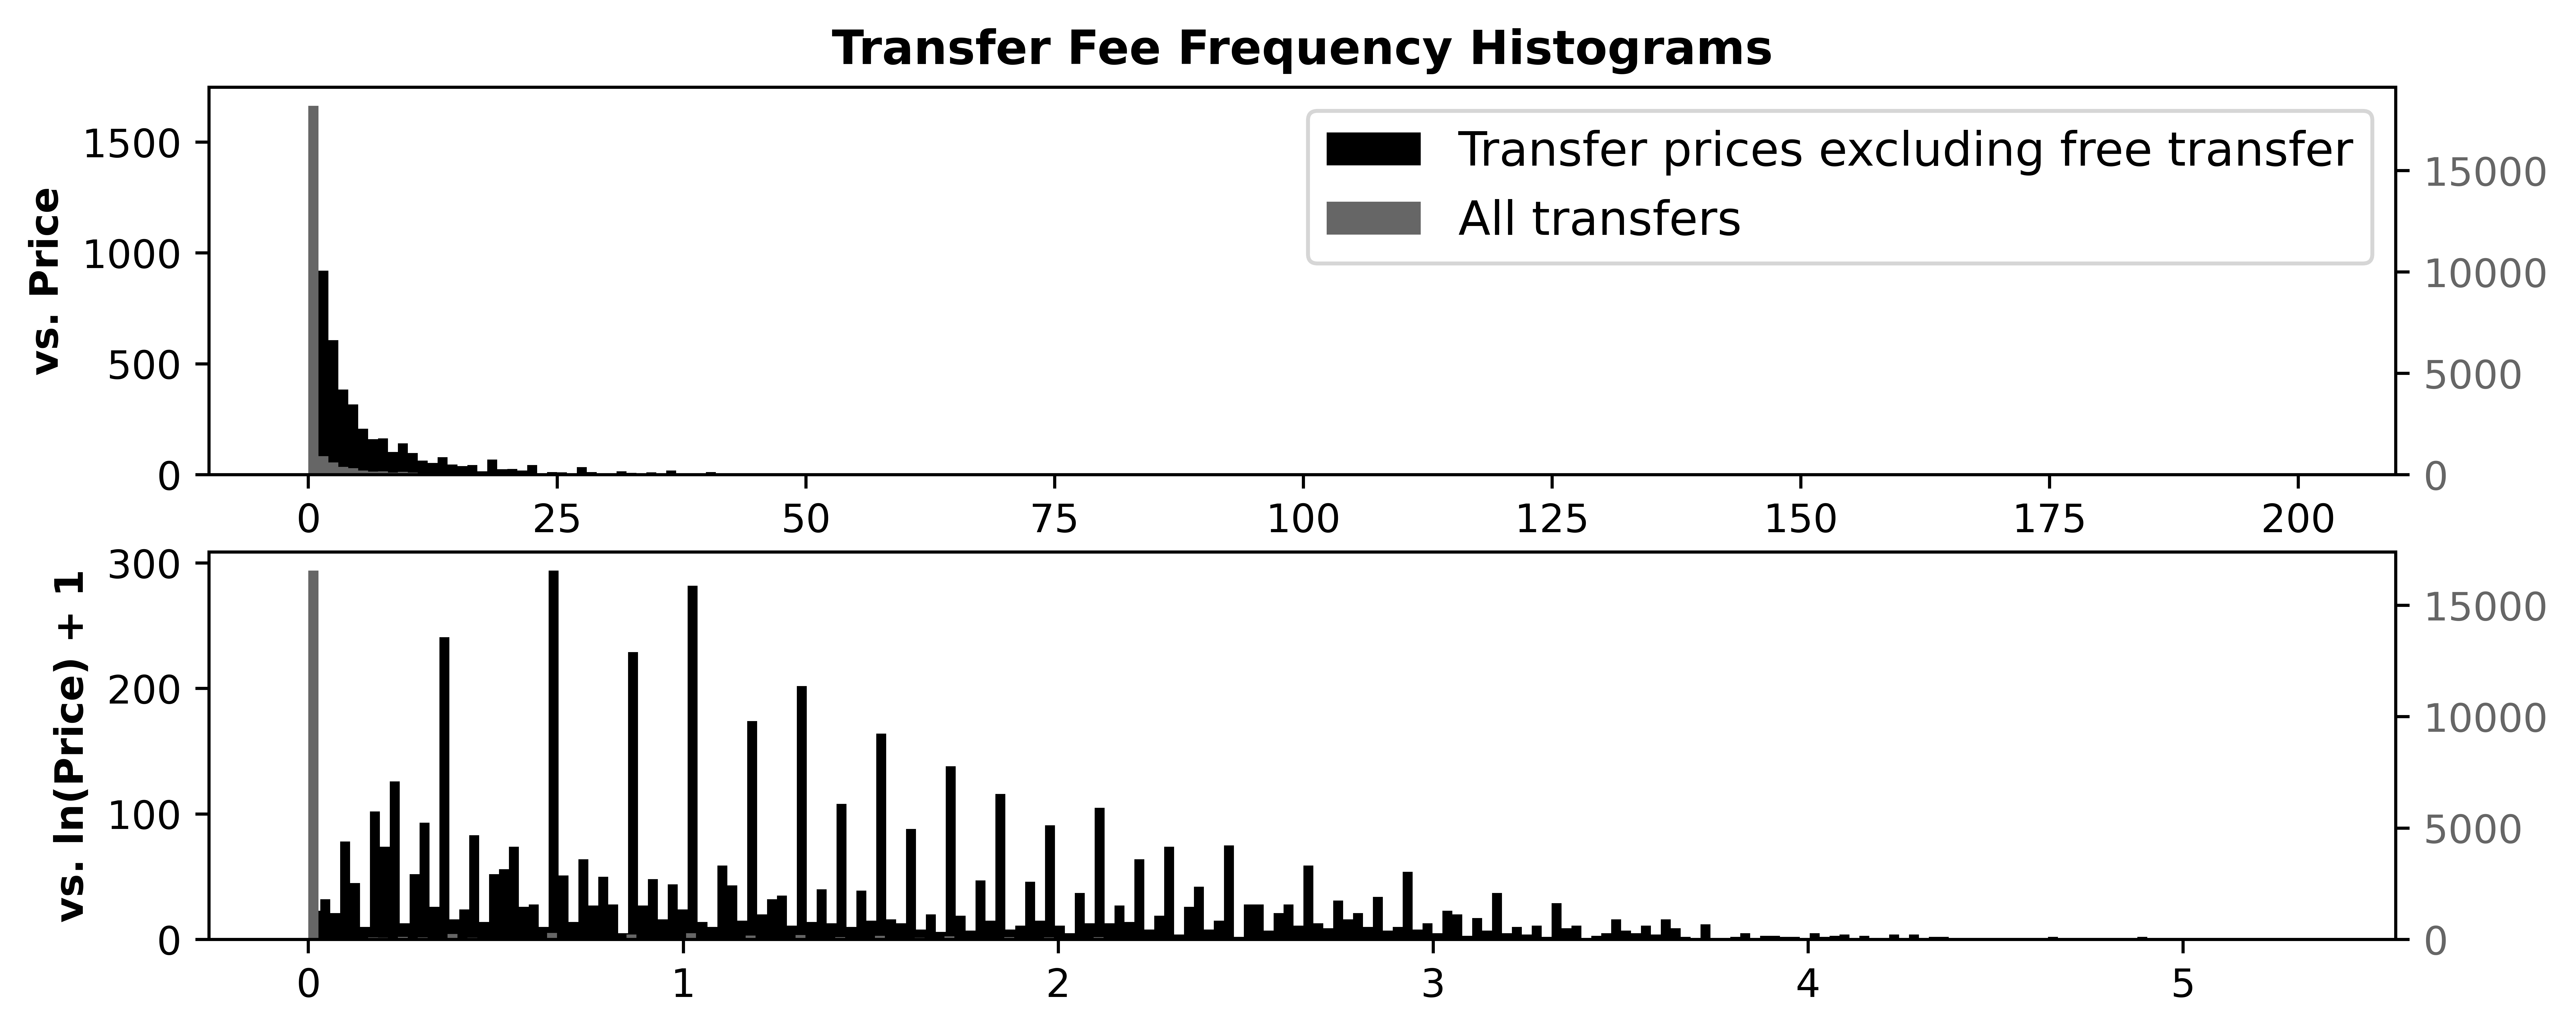

In [4]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,4)

fig, (ax1, ax3) = plt.subplots(2, 1)

ax1.set_ylabel('vs. Price', fontweight='bold')
_,_,ln1 = ax1.hist(df[df.fee_cleaned != 0]['fee_cleaned'], bins=200, color='C0', label='Transfer prices excluding free transfer')

ax2 = ax1.twinx()
_,_,ln2 = ax2.hist(df.fee_cleaned, bins=200, color='C1', label='All transfers')
ax2.tick_params(axis='y', labelcolor='C1')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper right', prop={'size': 12});
plt.title('Transfer Fee Frequency Histograms', fontweight='bold')

ax3.set_ylabel('vs. ln(Price) + 1', fontweight='bold')
_,_,ln1 = ax3.hist(np.log(df[df.fee_cleaned != 0]['fee_cleaned']+1), bins=200, color='C0', label='Transfer prices excluding free transfer')

ax4 = ax3.twinx()
_,_,ln2 = ax4.hist(np.log(df.fee_cleaned+1), bins=200, color='C1', label='All transfers')
ax4.tick_params(axis='y', labelcolor='C1')


plt.savefig('img/001-11TransferFeesSkewed.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


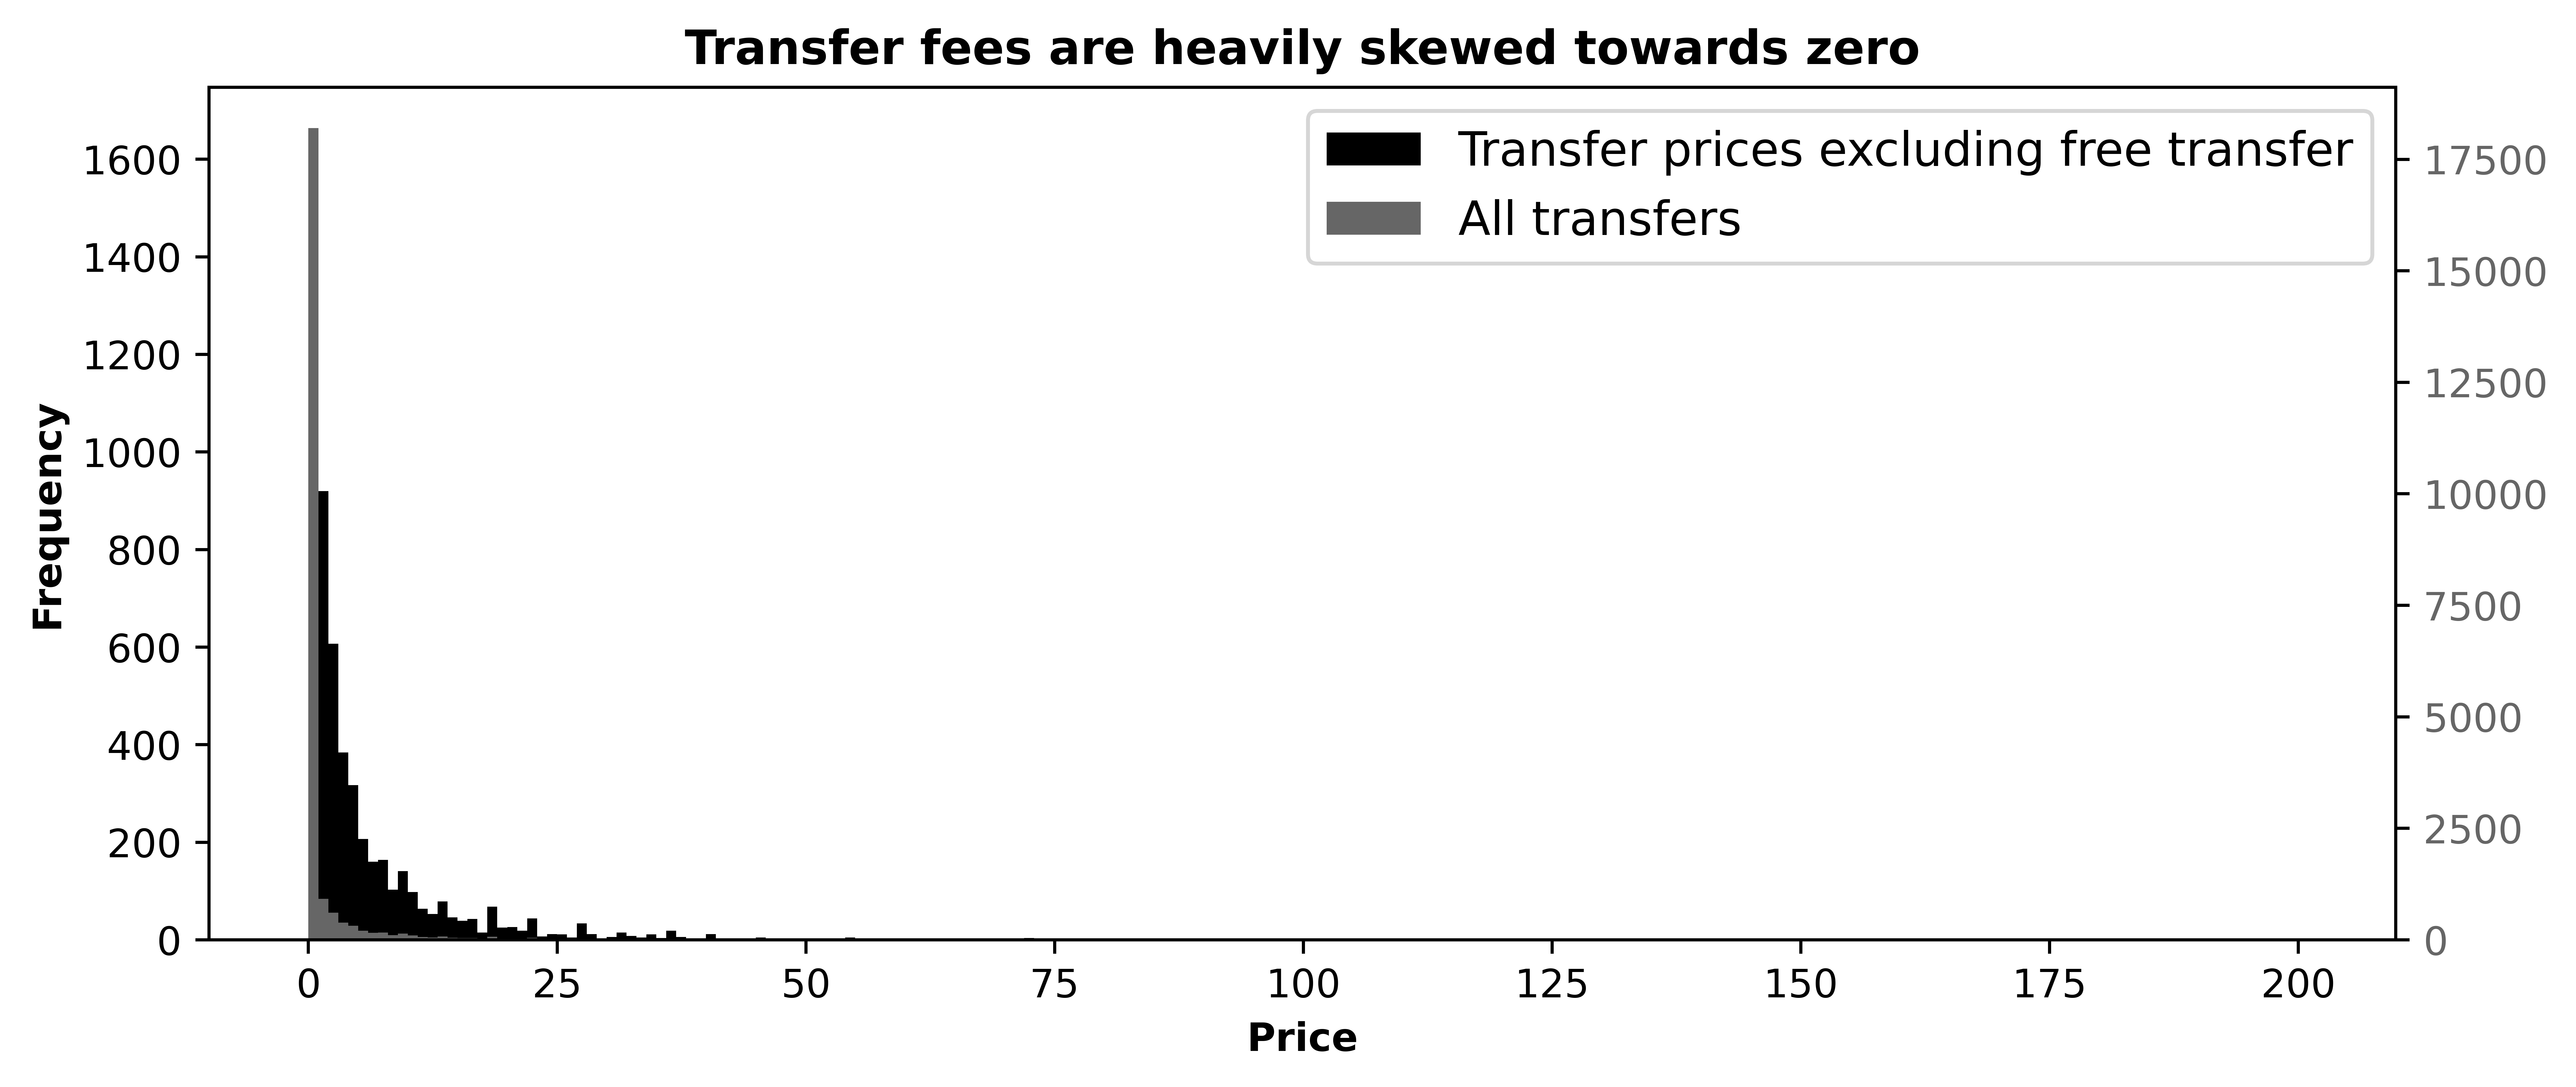

In [5]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,4)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Price', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
_,_,ln1 = ax1.hist(df[df.fee_cleaned != 0]['fee_cleaned'], bins=200, color='C0', label='Transfer prices excluding free transfer')

ax2 = ax1.twinx()
_,_,ln2 = ax2.hist(df.fee_cleaned, bins=200, color='C1', label='All transfers')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Transfer fees are heavily skewed towards zero', fontweight='bold')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper right', prop={'size': 12});

plt.savefig('img/001-1TransferFeesSkewed.eps', format='eps', bbox_inches='tight');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


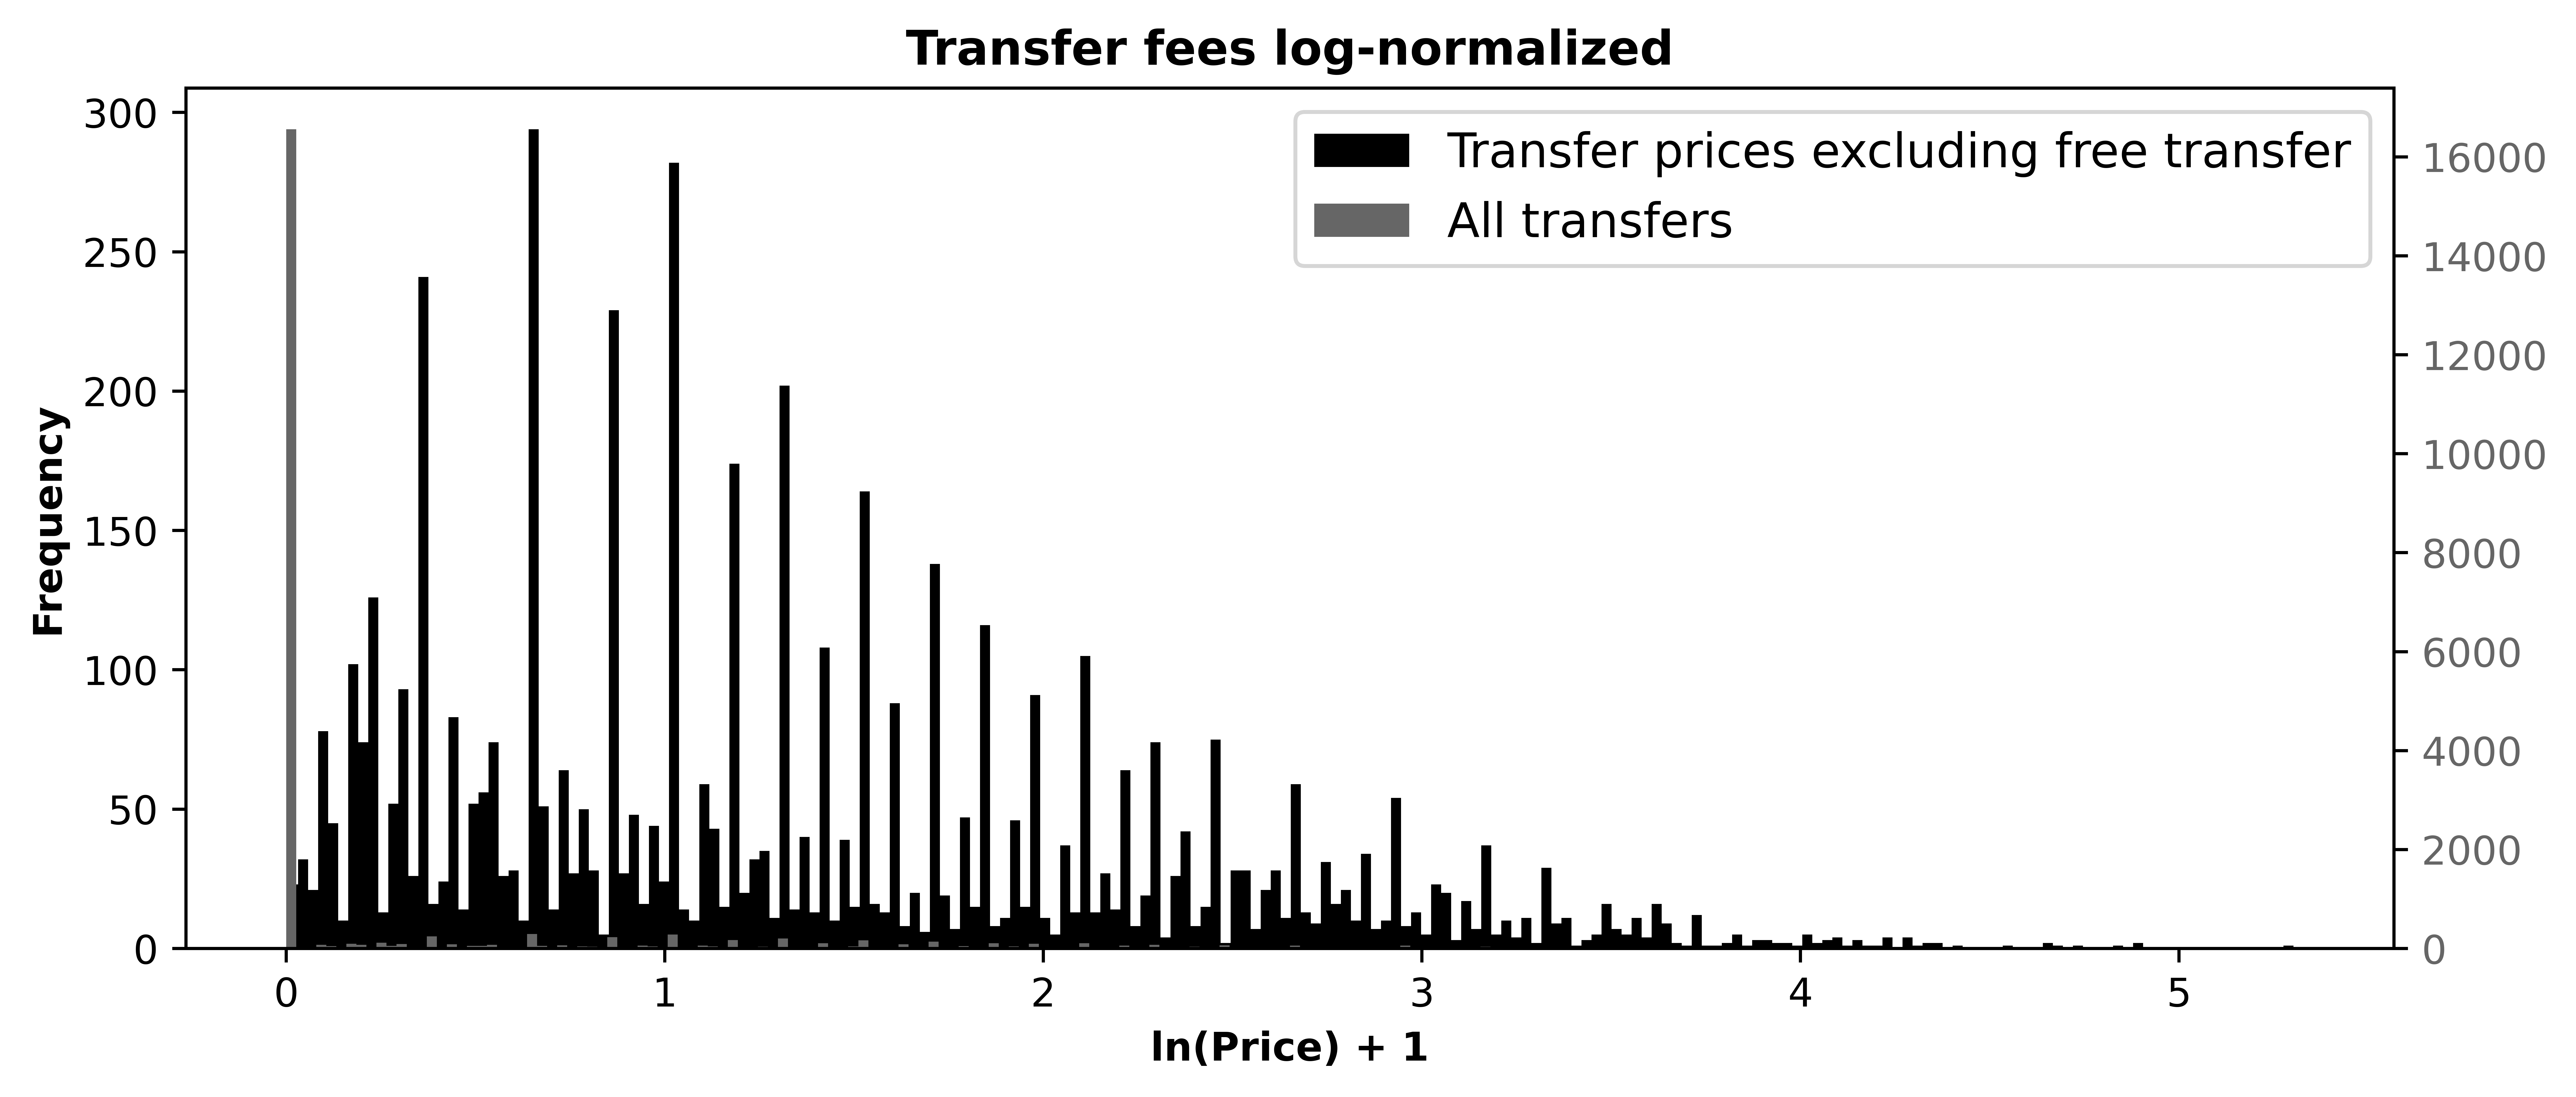

In [6]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,4)

fig, ax1 = plt.subplots()

ax1.set_xlabel('ln(Price) + 1', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
_,_,ln1 = ax1.hist(np.log(df[df.fee_cleaned != 0]['fee_cleaned']+1), bins=200, color='C0', label='Transfer prices excluding free transfer')

ax2 = ax1.twinx()
_,_,ln2 = ax2.hist(np.log(df.fee_cleaned+1), bins=200, color='C1', label='All transfers')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Transfer fees log-normalized', fontweight='bold')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='upper right', prop={'size': 12});

plt.savefig('img/001-2TransferFeesLog.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


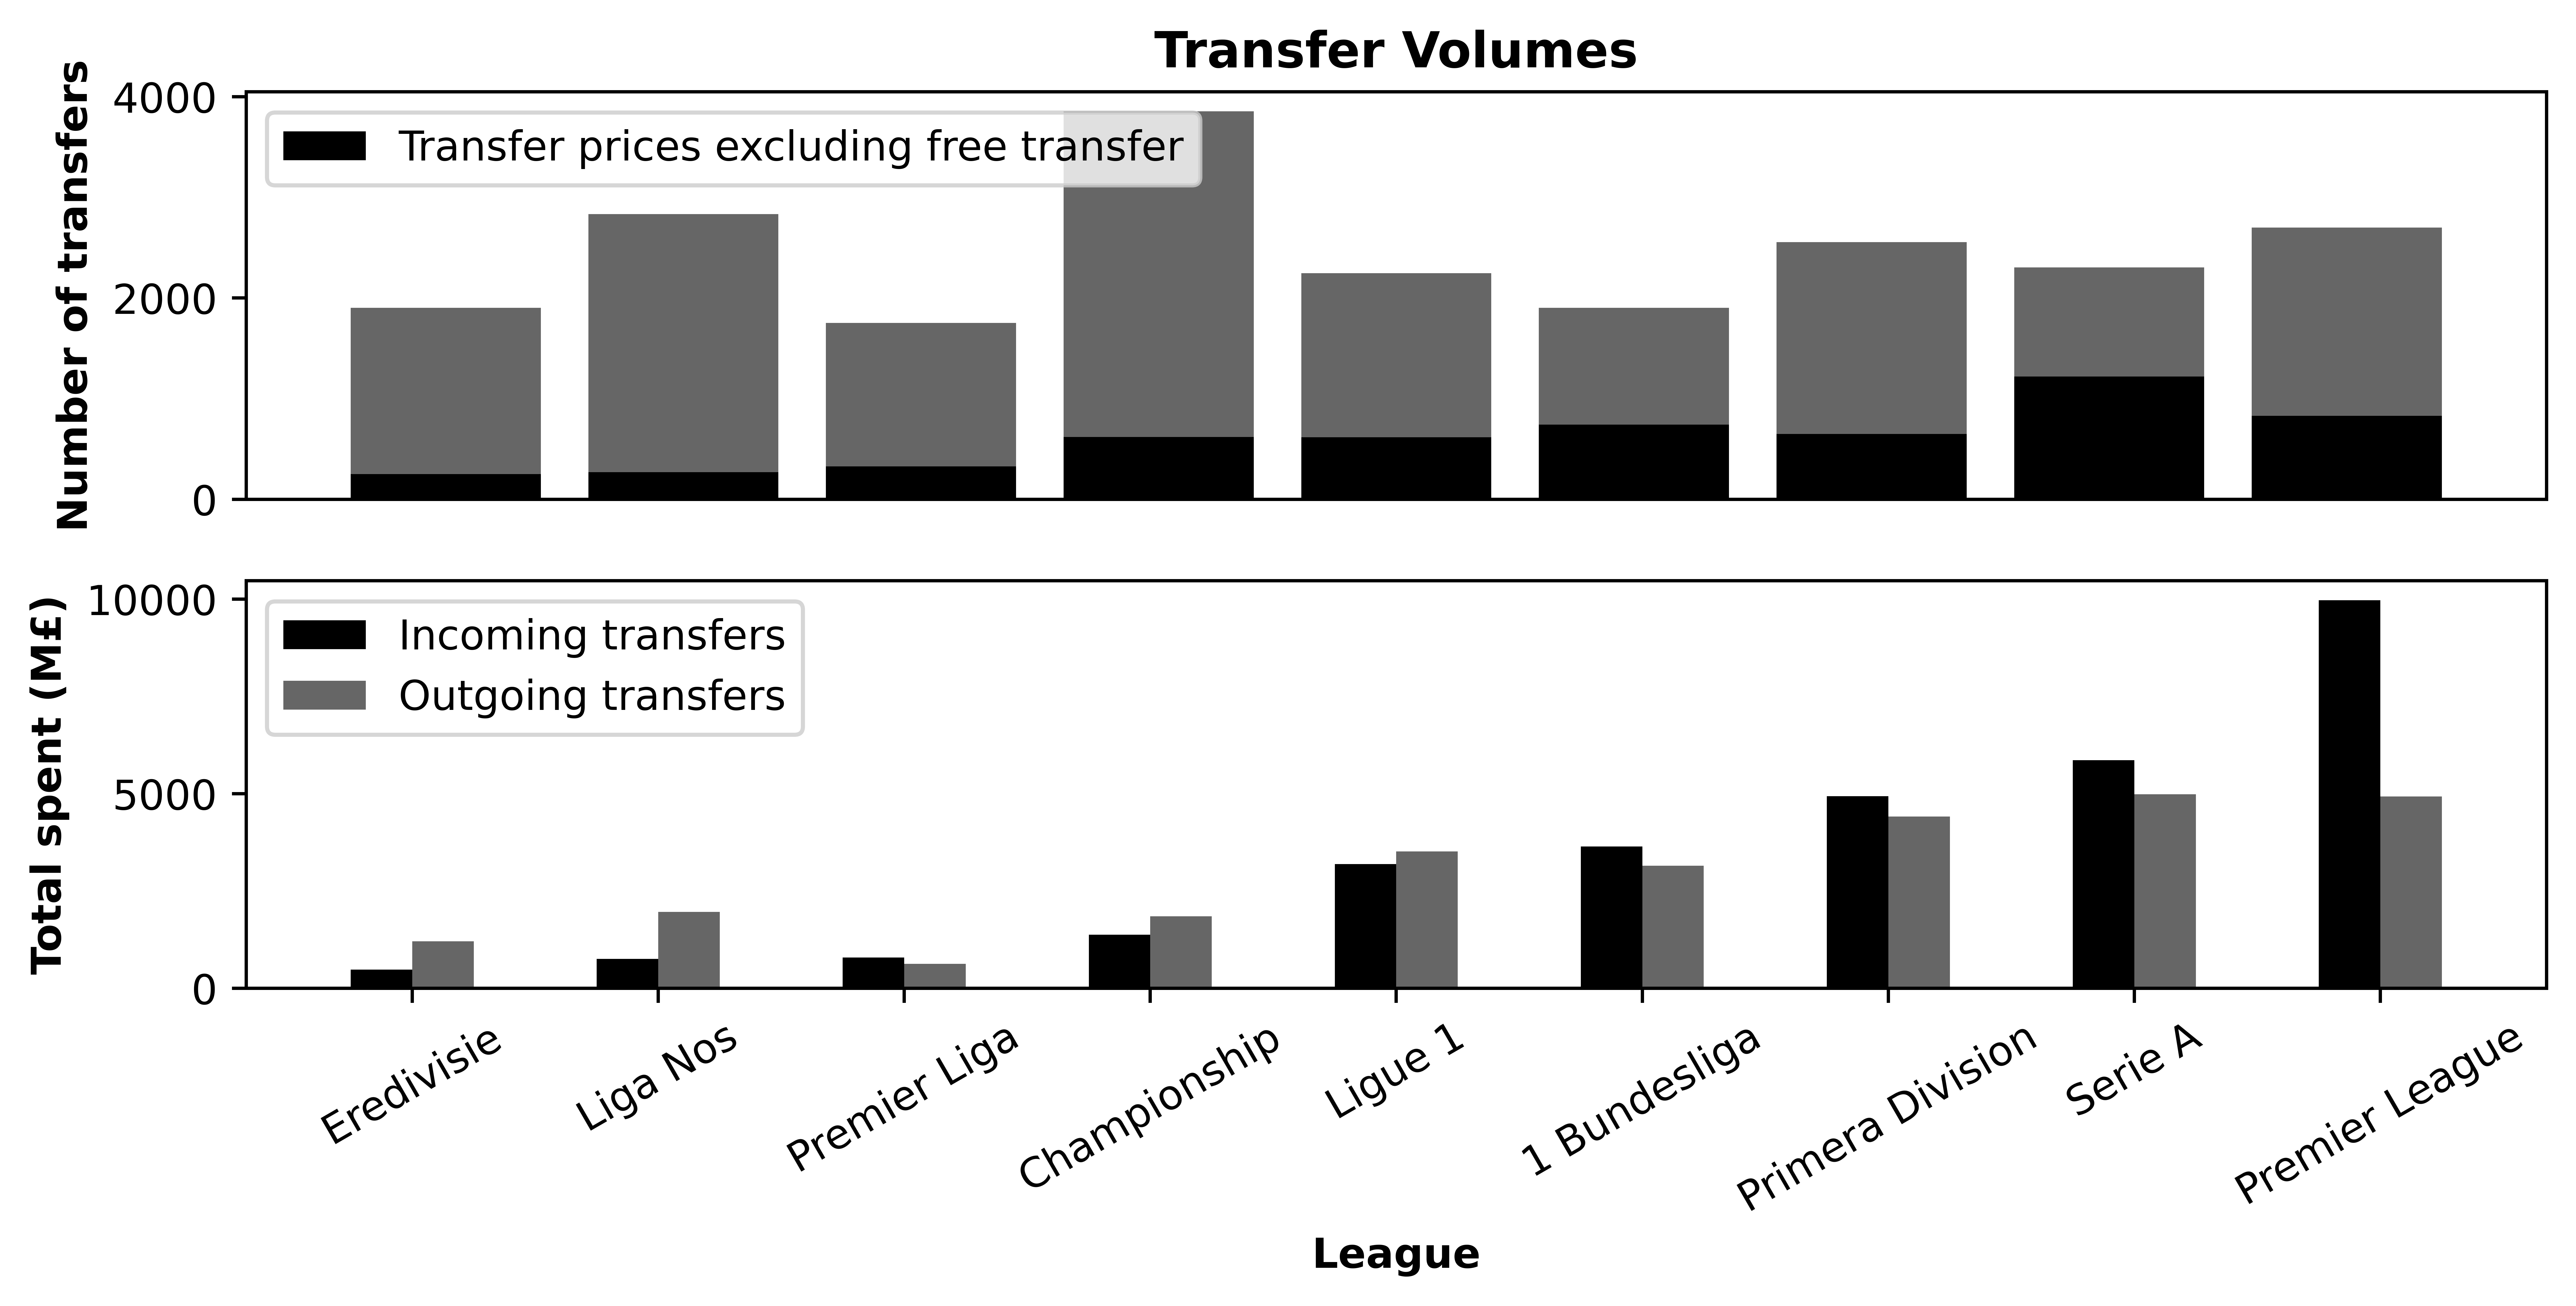

In [7]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,4)

data = df[df.fee_cleaned != 0].groupby('league_name').sum().sort_values('fee_cleaned')
data2 = df.groupby('league_name').count().sort_values('fee_cleaned')
data3 = df[df.fee_cleaned != 0].groupby('league_name').count().sort_values('fee_cleaned')

plt.subplot(2, 1, 1)
for league in data.index:
    plt.bar(league, data2[data2.index == league].fee_cleaned, color = 'C1', label = 'All transfers')
    plt.bar(league, data3[data3.index == league].fee_cleaned, color = 'C0', label = 'Paid transfers')

#for i, row in df.groupby('league_name').count().sort_values('fee_cleaned').iterrows():
#    plt.bar(row.name, row.fee_cleaned, color = 'C1', label = 'All Transfers')
#for i, row in df[df.fee_cleaned != 0].groupby('league_name').count().iterrows():
#    plt.bar(row.name, row.fee_cleaned, color = 'C0', label = 'Paid Transfers')
plt.ylabel('Number of transfers', fontweight='bold')
plt.xticks([])

plt.title('Transfer Volumes', fontweight='bold')

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left');

plt.subplot(2,1,2)
data = df[df.fee_cleaned != 0].groupby('league_name').sum().sort_values('fee_cleaned')
x = [i - 0.125 for i in range(len(data))]
x_labels = data.index.unique()
y = [data[data.index == i]['fee_cleaned'].values[0] for i in x_labels]
plt.bar(x, y, width=0.25, color = 'C0', label = 'Incoming transfers')

data = df_out[df_out.fee_cleaned != 0].groupby('league_name').sum()
x = [i + 0.125 for i in range(len(data))]
y = [data[data.index == i]['fee_cleaned'].values[0] for i in x_labels]
plt.bar(x, y, width=0.25, color = 'C1', label = 'Outgoing transfers')

plt.xlabel('League', fontweight='bold')
plt.ylabel('Total spent (M£)', fontweight='bold')

x = [i for i in range(len(data))]
plt.xticks(x, x_labels, rotation=30)
plt.legend()

plt.savefig('img/001-33TransferVolum.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


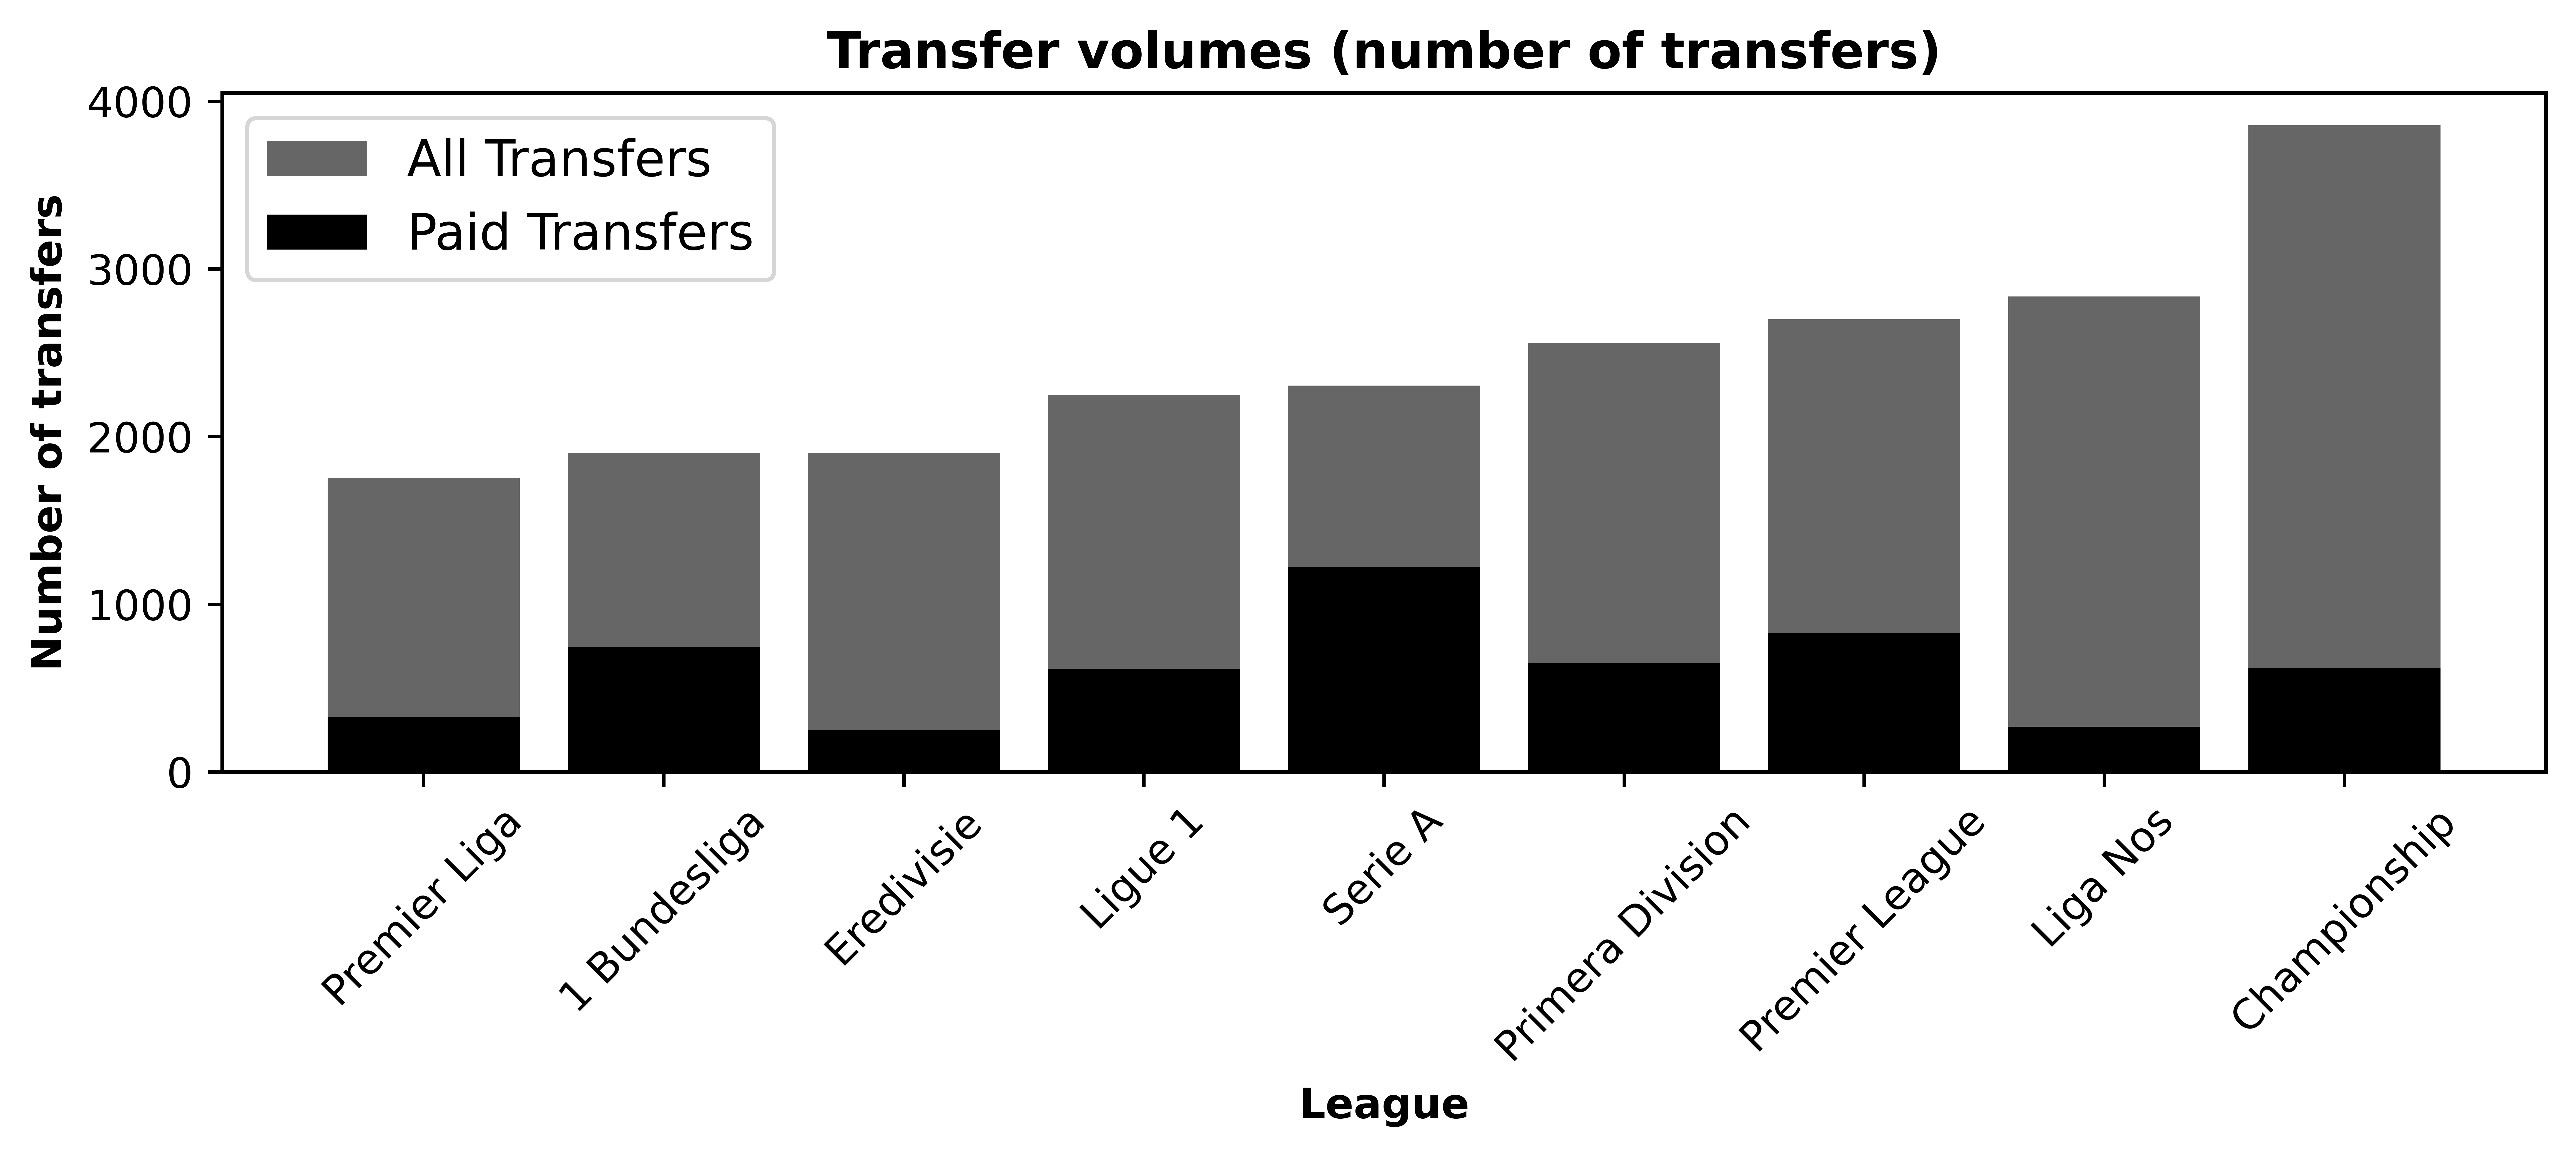

In [8]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,3)

for i, row in df.groupby('league_name').count().sort_values('fee_cleaned').iterrows():
    plt.bar(row.name, row.fee_cleaned, color = 'C1', label = 'All Transfers')
for i, row in df[df.fee_cleaned != 0].groupby('league_name').count().iterrows():
    plt.bar(row.name, row.fee_cleaned, color = 'C0', label = 'Paid Transfers')
plt.xlabel('League', fontweight='bold')
plt.ylabel('Number of transfers', fontweight='bold')
plt.xticks(rotation=45)


plt.title('Transfer volumes (number of transfers)', fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', prop={'size': 12});

plt.savefig('img/001-3TransferVolumeQuantity.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


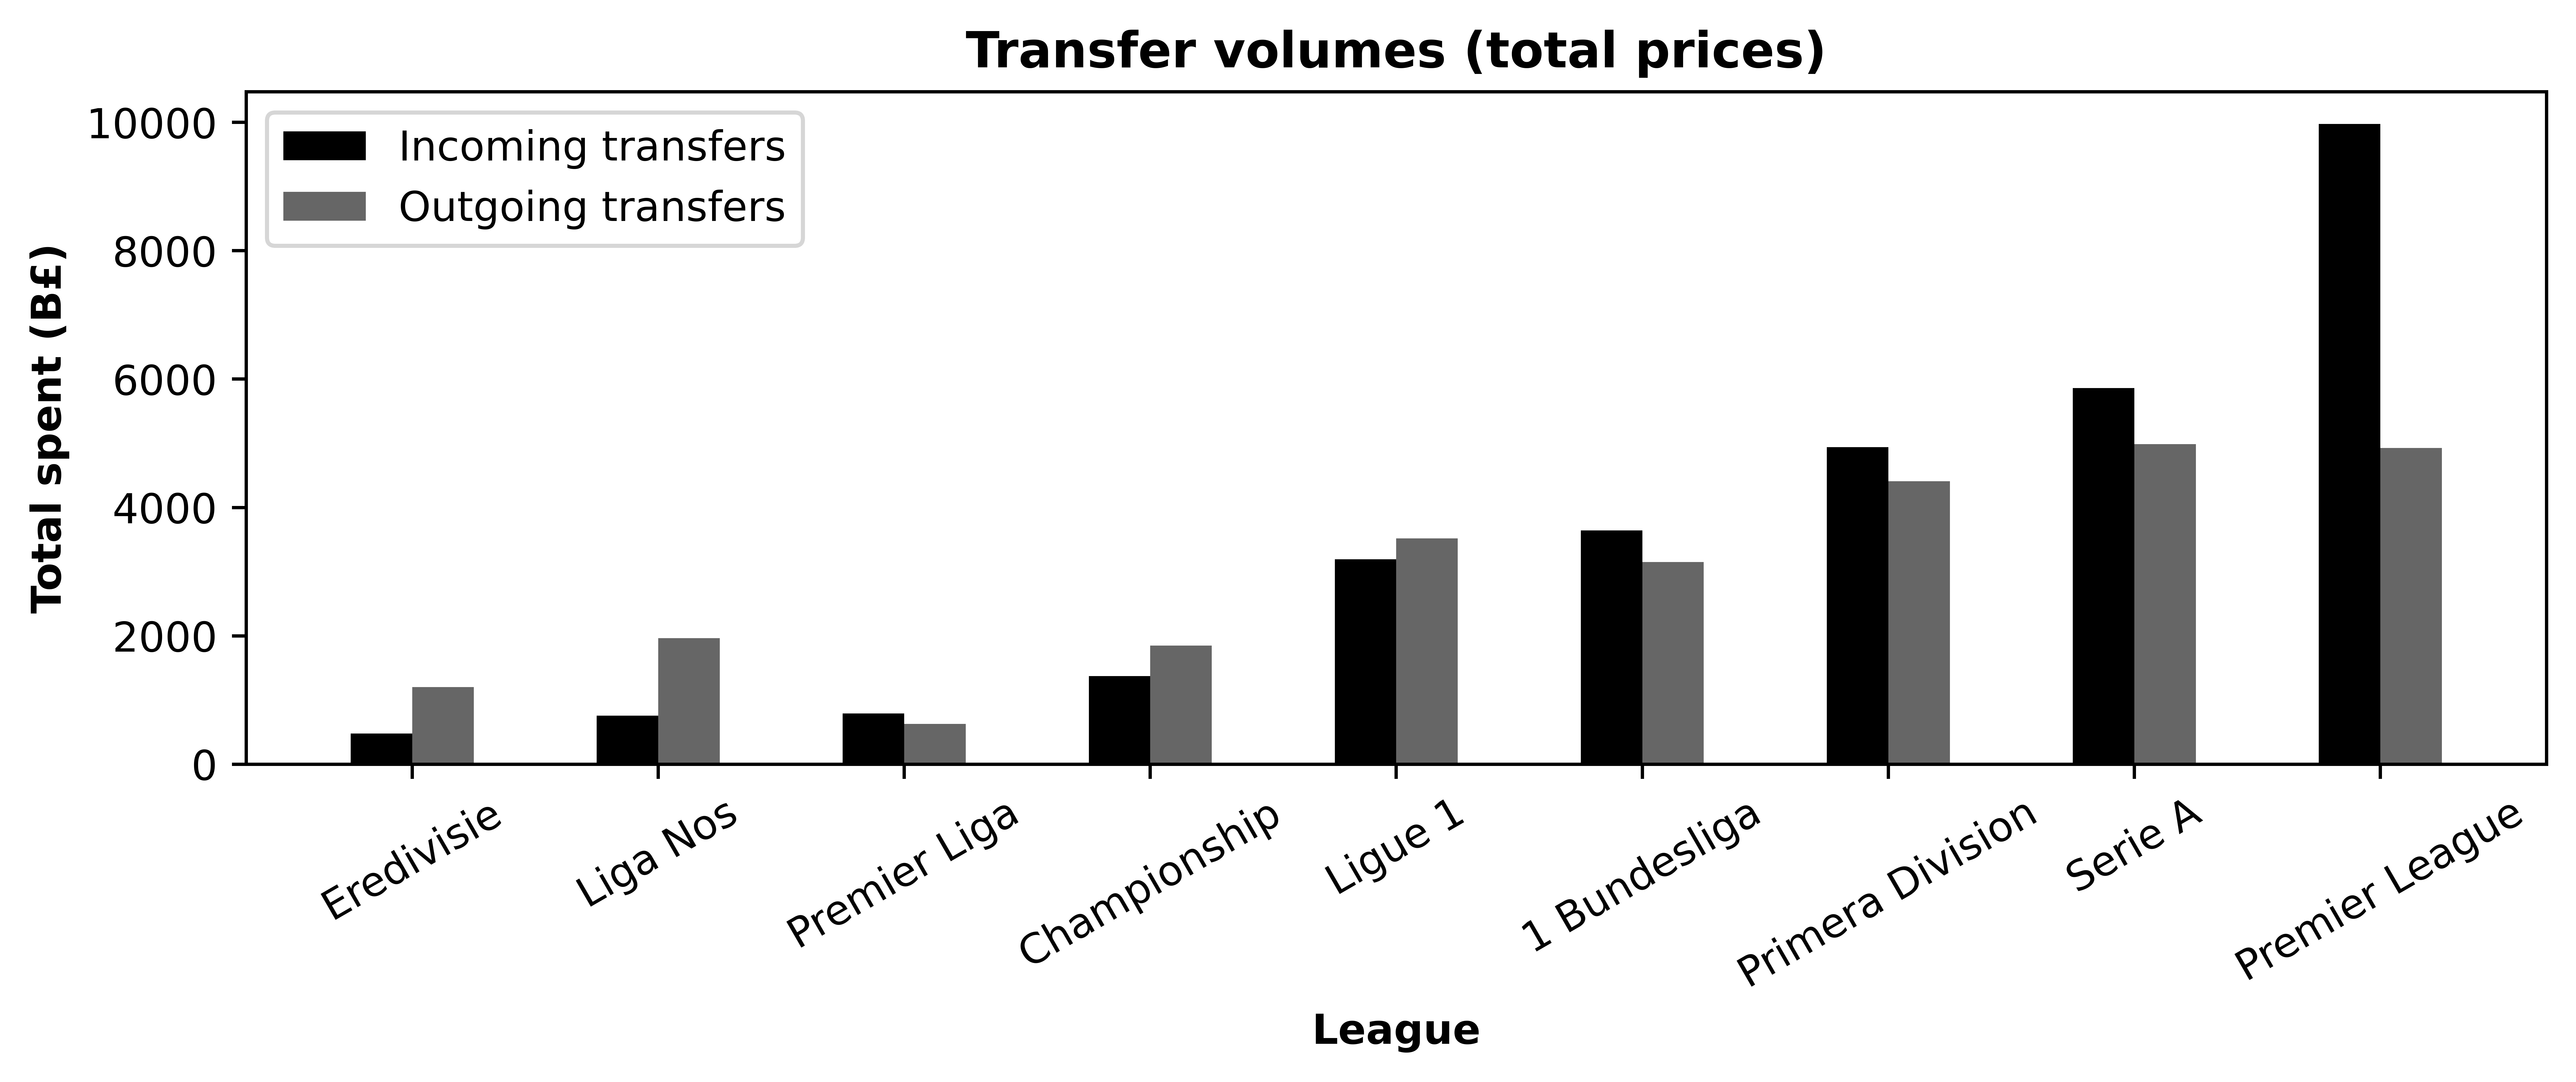

In [9]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,3)

data = df[df.fee_cleaned != 0].groupby('league_name').sum().sort_values('fee_cleaned')
x = [i - 0.125 for i in range(len(data))]
x_labels = data.index.unique()
y = [data[data.index == i]['fee_cleaned'].values[0] for i in x_labels]
plt.bar(x, y, width=0.25, color = 'C0', label = 'Incoming transfers')

data = df_out[df_out.fee_cleaned != 0].groupby('league_name').sum()
x = [i + 0.125 for i in range(len(data))]
y = [data[data.index == i]['fee_cleaned'].values[0] for i in x_labels]
plt.bar(x, y, width=0.25, color = 'C1', label = 'Outgoing transfers')

plt.xlabel('League', fontweight='bold')
plt.ylabel('Total spent (B£)', fontweight='bold')

x = [i for i in range(len(data))]
plt.xticks(x, x_labels, rotation=30)
plt.title('Transfer volumes (total prices)', fontweight='bold')
plt.legend()

plt.savefig('img/001-4TransferVolumeSum.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


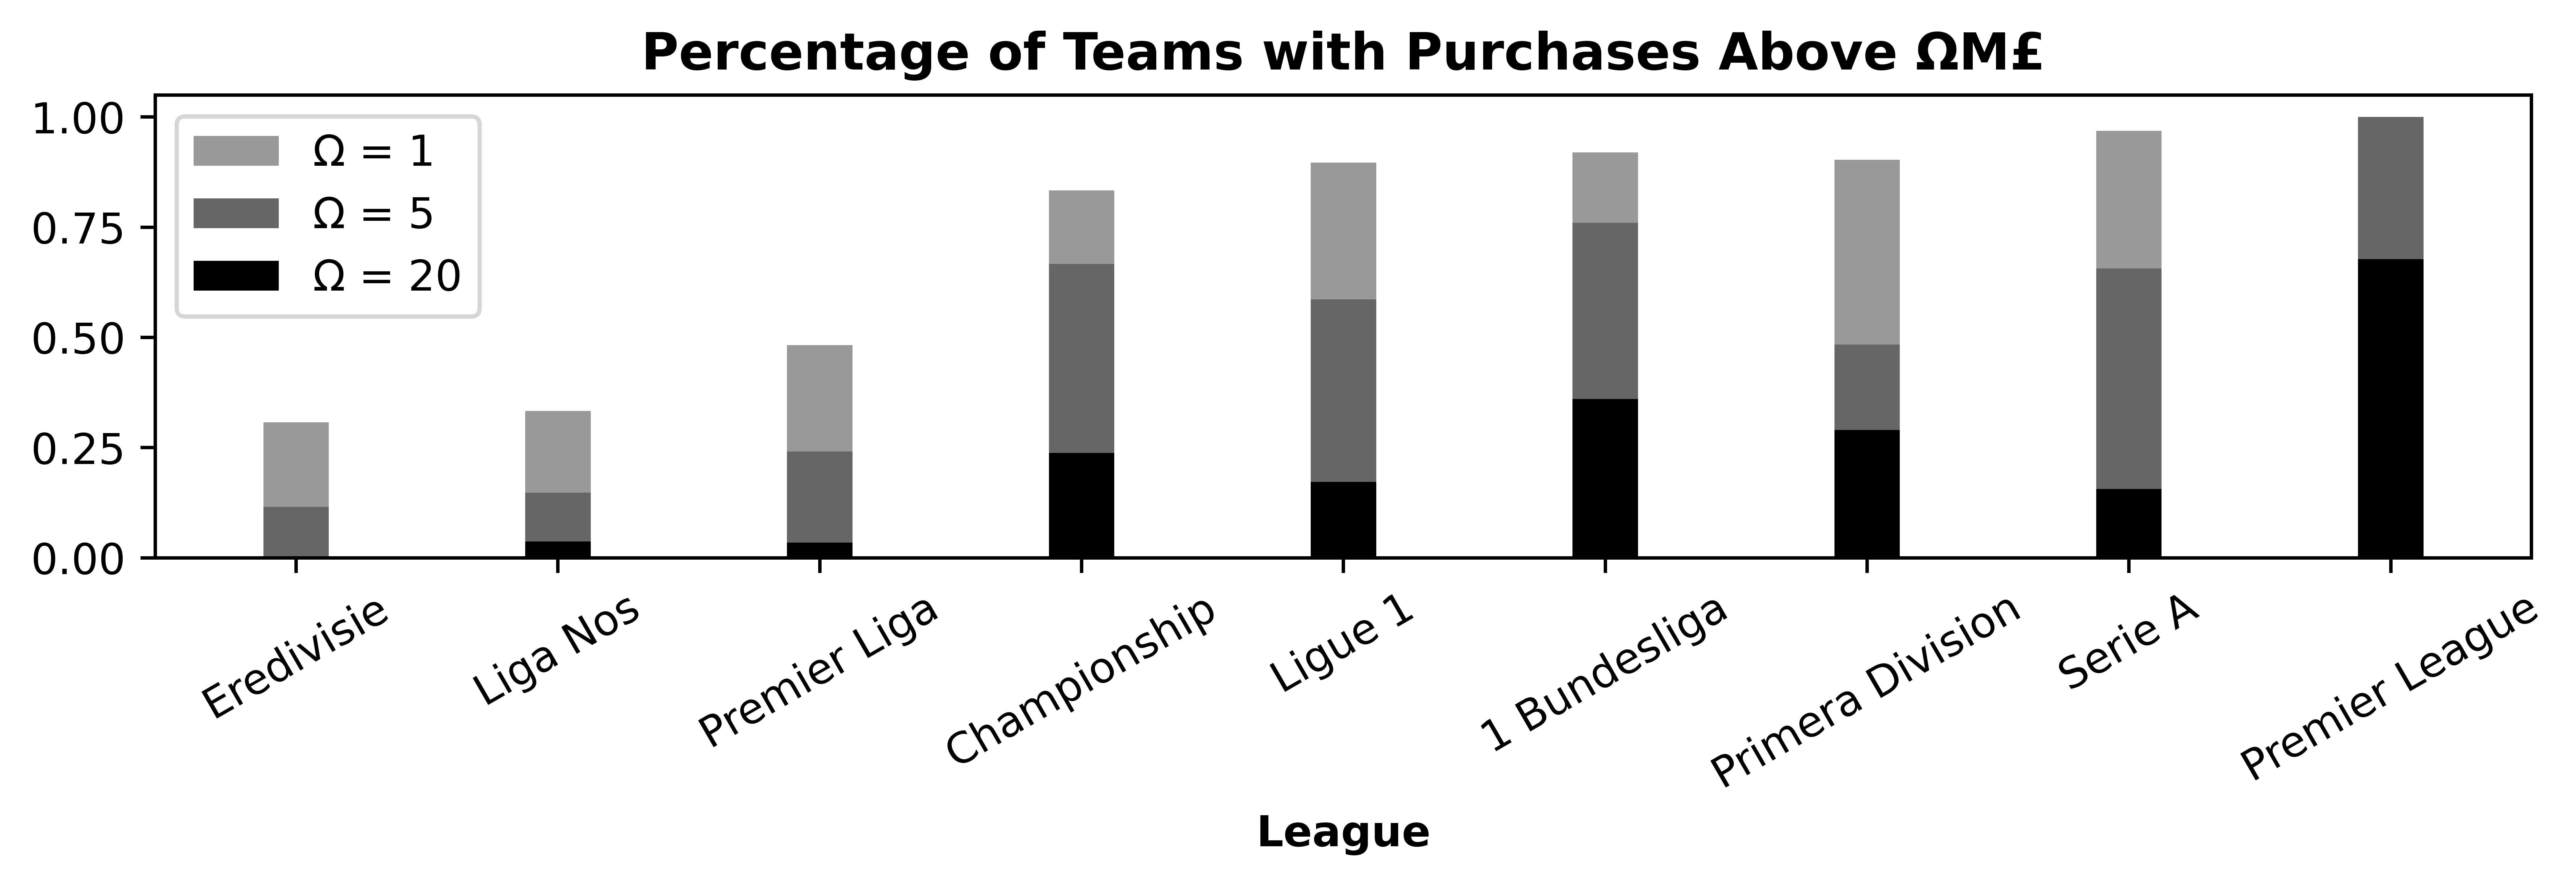

In [10]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,2)

data = df[df.fee_cleaned != 0].groupby('league_name').sum().sort_values('fee_cleaned')
x_labels = data.index.unique()
y1 = []
y5 = []
y20 = []
for league in x_labels:
    y_raw1 = []
    y_raw5 = []
    y_raw20 = []
    for club in df[df.league_name == league]['club_name'].unique():
        if any(df[df.club_name == club]['fee_cleaned'] > 20):
            y_raw1.append(1)
            y_raw5.append(1)
            y_raw20.append(1)
        elif any(df[df.club_name == club]['fee_cleaned'] > 5):
            y_raw1.append(1)
            y_raw5.append(1)
            y_raw20.append(0)
        elif any(df[df.club_name == club]['fee_cleaned'] > 1):
            y_raw1.append(1)
            y_raw5.append(0)
            y_raw20.append(0)
        else:
            y_raw1.append(0)
            y_raw5.append(0)
            y_raw20.append(0)
    y1.append(sum(y_raw1)/len(y_raw1))
    y5.append(sum(y_raw5)/len(y_raw5))
    y20.append(sum(y_raw20)/len(y_raw20))

plt.bar(x_labels, y1, width=0.25, color = 'C2', label = 'Ω = 1')
plt.bar(x_labels, y5, width=0.25, color = 'C1', label = 'Ω = 5')
plt.bar(x_labels, y20, width=0.25, color = 'C0', label = 'Ω = 20')


plt.xlabel('League', fontweight='bold')
plt.xticks(rotation=30)
plt.title('Percentage of Teams with Purchases Above ΩM£', fontweight='bold')
plt.legend()

plt.savefig('img/001-5TransfersOver1M.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


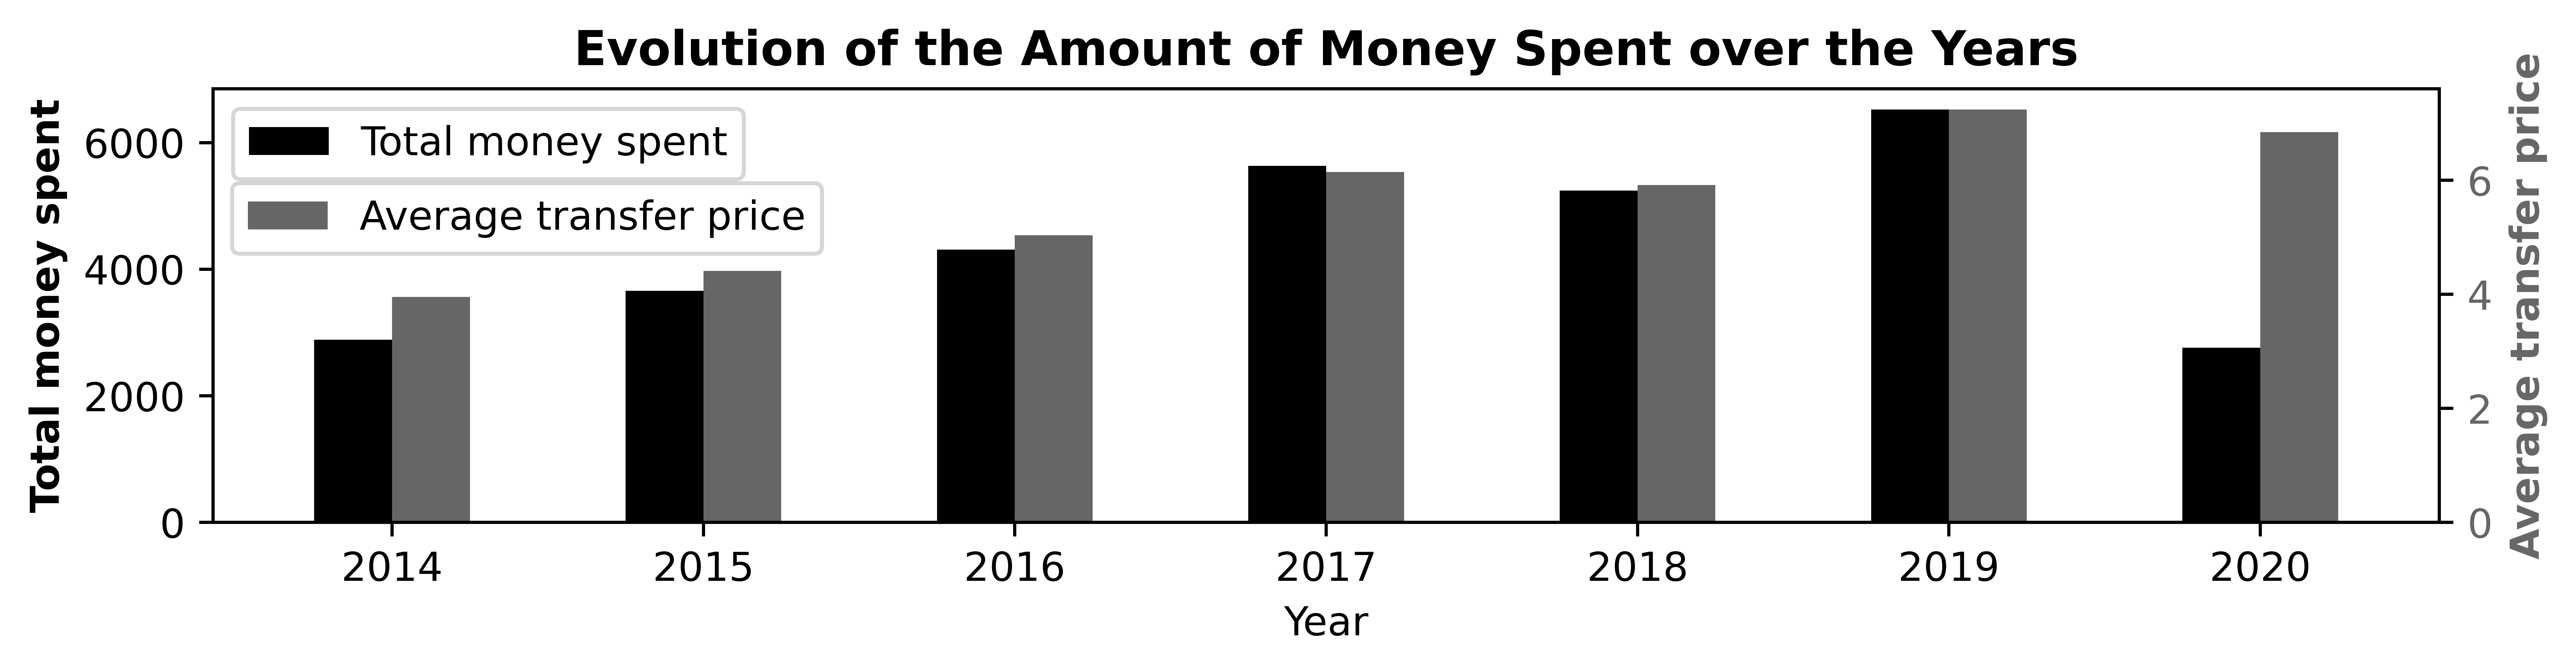

In [11]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1080
plt.rcParams['figure.figsize'] = (10,2)


fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Total money spent', fontweight='bold')
data = df[df.fee_cleaned != 0].groupby('year').sum().sort_values('fee_cleaned')
plt.bar(data.index-0.125, data.fee_cleaned, width = 0.25, color = 'C0', label = 'Total money spent')
plt.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('Average transfer price', color = 'C1', fontweight='bold')
data = df[df.fee_cleaned != 0].groupby('year').mean().sort_values('fee_cleaned')
plt.bar(data.index+0.125, data.fee_cleaned, width = 0.25, color = 'C1', label = 'Average transfer price')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Evolution of the Amount of Money Spent over the Years', fontweight='bold')
plt.legend(loc=(0.0085, 0.62))

plt.savefig('img/001-6InflationOverYears.eps', format='eps', bbox_inches='tight')